In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('../input/us-accidents/US_Accidents_Dec21_updated.csv')

In [3]:
df.dropna(inplace = True)
df=df[df.Severity != 0]
df.drop(columns = ['ID'], inplace = True)
df.drop(columns = ['Description'], inplace = True)
categorical_columns = df.select_dtypes(include=['object','bool','datetime64[ns]']).columns
categorical_columns
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

In [4]:
target = 'Severity'
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [5]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
accuracy_lst=[]
import time
start = time.time()
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
print("Total time: ", time.time() - start, "seconds")
# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

import time
start = time.time()
# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)
print("Total time: ", time.time() - start, "seconds")
# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

Total time:  26.358200788497925 seconds
[Decision Tree -- entropy] accuracy_score: 0.959.
Total time:  23.811800241470337 seconds
[Decision Tree -- gini] accuracy_score: 0.959.


In [6]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
import time
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
print("Total time: ", time.time() - start, "seconds")
y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

Total time:  579.0821375846863 seconds
[Randon forest algorithm] accuracy_score: 0.966.


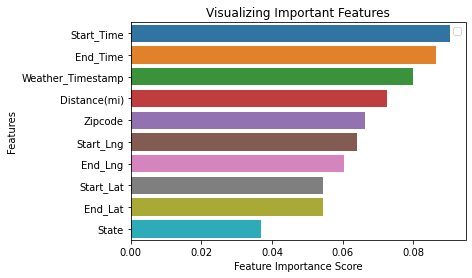

In [7]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [8]:
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Time           0.090288
End_Time             0.086400
Weather_Timestamp    0.080015
Distance(mi)         0.072574
Zipcode              0.066306
Start_Lng            0.063943
End_Lng              0.060389
Start_Lat            0.054466
End_Lat              0.054448
State                0.036838
Pressure(in)         0.034372
Number               0.030270
Humidity(%)          0.025849
Street               0.025745
Wind_Chill(F)        0.023437
Temperature(F)       0.023091
County               0.022257
City                 0.021300
Airport_Code         0.020411
Wind_Speed(mph)      0.017915
dtype: float64

In [9]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)
import time
start = time.time()
# Train the selector
sfm.fit(X_train, y_train)
print("Total time: ", time.time() - start, "seconds")
feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Total time:  588.6824932098389 seconds
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
State
Zipcode
Weather_Timestamp
Pressure(in)


In [10]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
start = time.time()
# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)
print("Total time: ", time.time() - start, "seconds")

Total time:  209.05940890312195 seconds


In [11]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.966.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.965.
